In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud

In [3]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [4]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [6]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                 pd.DataFrame(linnerud.target, columns=linnerud.target_names)], axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [7]:
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [9]:
df.isna().sum() #결측 값 없음

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

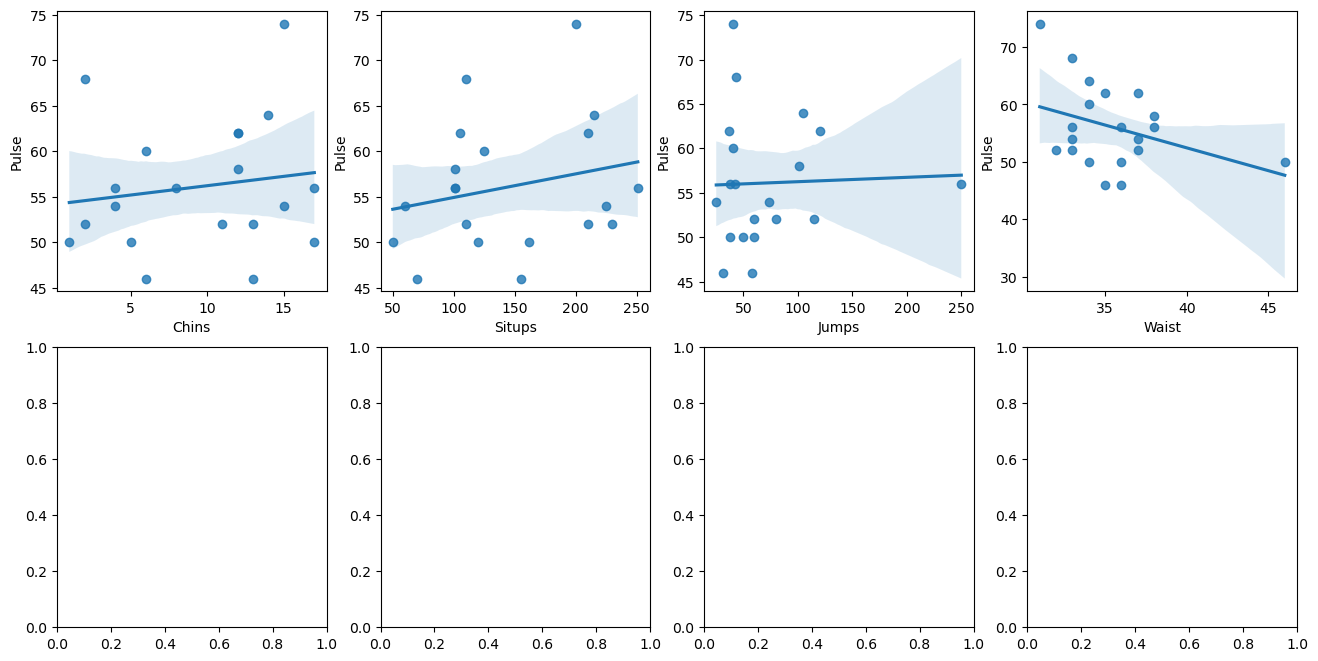

In [17]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Chins','Situps','Jumps','Waist']

for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Pulse', data=df, ax=axs[row][col])

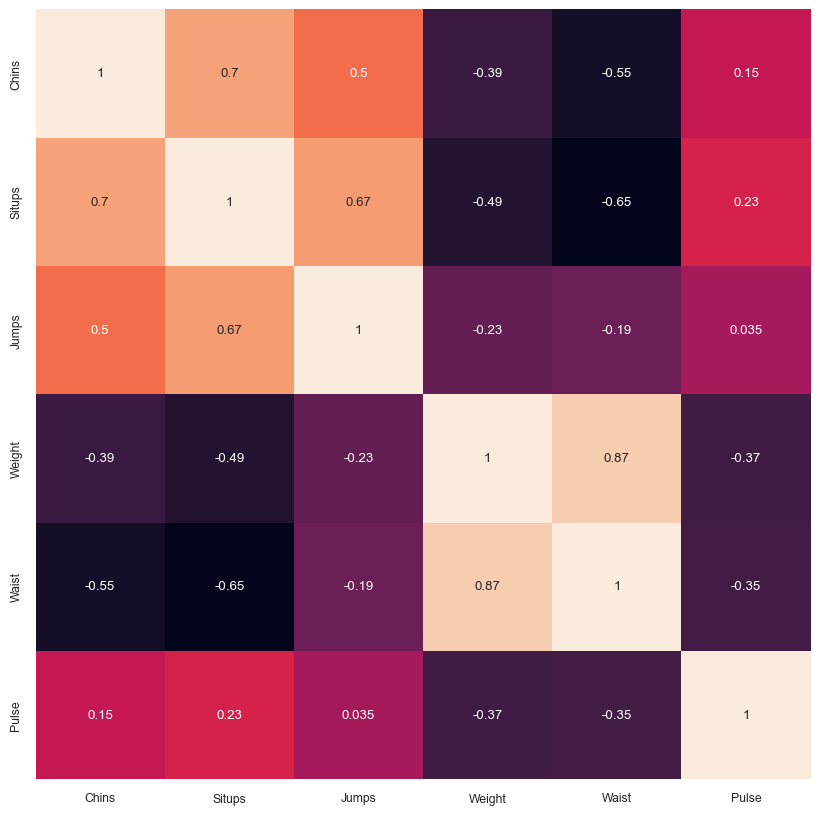

In [20]:
#상관관계 행렬
df_corr = df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False) #annot:숫자, cbar:바
plt.show()
#여기서 연관성이 큰 feature만 사용하면 효율 증진

In [34]:
#set data
y = df.Pulse
X = df.drop('Pulse', axis=1)

In [35]:
X.shape

(20, 5)

In [36]:
y #Regression 문제라서 one-hot encoding 필요없음

0     50.0
1     52.0
2     58.0
3     62.0
4     46.0
5     56.0
6     56.0
7     60.0
8     74.0
9     56.0
10    50.0
11    52.0
12    64.0
13    50.0
14    46.0
15    62.0
16    54.0
17    52.0
18    54.0
19    68.0
Name: Pulse, dtype: float64

In [37]:
# train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=423)

## FCN

In [80]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM
from keras.optimizers import SGD,Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l1

model0 = Sequential()

model0.add(Dense(5,input_shape=(5,), activation='relu', kernel_regularizer=l1(0.01)))
model0.add(Dense(32,activation='relu', kernel_regularizer=l1(0.01)))
model0.add(Dense(16,activation='relu', kernel_regularizer=l1(0.01)))
model0.add(Dense(1,activation='linear'))

model0.compile(Adam(learning_rate=0.02), loss='mean_squared_error', metrics=['mae'])
#classification, model0.compile(Adam(learning_rate=0.02),'binary_crossentropy',metrics=['accuracy'])

model0.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 5)                 30        
                                                                 
 dense_50 (Dense)            (None, 32)                192       
                                                                 
 dense_51 (Dense)            (None, 16)                528       
                                                                 
 dense_52 (Dense)            (None, 1)                 17        
                                                                 
Total params: 767 (3.00 KB)
Trainable params: 767 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
model0_history=model0.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test, y_test))
y_pred = model0.predict(X_test)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 4036.1851 - mae: 63.0766 - val_loss: 1879.2052 - val_mae: 42.9787
Epoch 2/100
1/1 [==============================] - 0s 65ms/step - loss: 2187.4934 - mae: 46.2007 - val_loss: 692.1005 - val_mae: 25.2944
Epoch 3/100
1/1 [==============================] - 0s 66ms/step - loss: 912.0278 - mae: 29.0792 - val_loss: 86.6441 - val_mae: 7.3896
Epoch 4/100
1/1 [==============================] - 0s 71ms/step - loss: 154.8930 - mae: 9.7301 - val_loss: 711.4477 - val_mae: 23.8618
Epoch 5/100
1/1 [==============================] - 0s 69ms/step - loss: 559.5579 - mae: 20.8588 - val_loss: 908.8450 - val_mae: 27.5548
Epoch 6/100
1/1 [==============================] - 0s 71ms/step - loss: 727.1273 - mae: 23.3727 - val_loss: 491.9905 - val_mae: 19.1127
Epoch 7/100
1/1 [==============================] - 0s 64ms/step - loss: 374.9457 - mae: 16.7970 - val_loss: 152.6458 - val_mae: 11.4657
Epoch 8/100
1/1 [==============================] -

Epoch 62/100
1/1 [==============================] - 0s 78ms/step - loss: 60.2821 - mae: 6.0426 - val_loss: 151.2015 - val_mae: 10.1814
Epoch 63/100
1/1 [==============================] - 0s 65ms/step - loss: 60.4004 - mae: 6.0615 - val_loss: 149.4383 - val_mae: 10.1279
Epoch 64/100
1/1 [==============================] - 0s 67ms/step - loss: 59.9016 - mae: 6.0071 - val_loss: 147.7965 - val_mae: 10.0776
Epoch 65/100
1/1 [==============================] - 0s 115ms/step - loss: 59.7728 - mae: 5.9813 - val_loss: 148.5674 - val_mae: 10.0976
Epoch 66/100
1/1 [==============================] - 0s 114ms/step - loss: 59.5450 - mae: 5.9560 - val_loss: 151.5089 - val_mae: 10.1911
Epoch 67/100
1/1 [==============================] - 0s 120ms/step - loss: 59.2508 - mae: 5.9761 - val_loss: 154.7154 - val_mae: 10.3172
Epoch 68/100
1/1 [==============================] - 0s 113ms/step - loss: 59.0649 - mae: 5.9857 - val_loss: 153.1160 - val_mae: 10.2564
Epoch 69/100
1/1 [==============================] -

In [82]:
y_pred

array([[47.375546],
       [55.735813],
       [67.498825],
       [44.253162]], dtype=float32)

In [83]:
from sklearn.metrics import mean_squared_error

mse = np.sqrt(mean_squared_error(y_pred, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 12.668890890173792


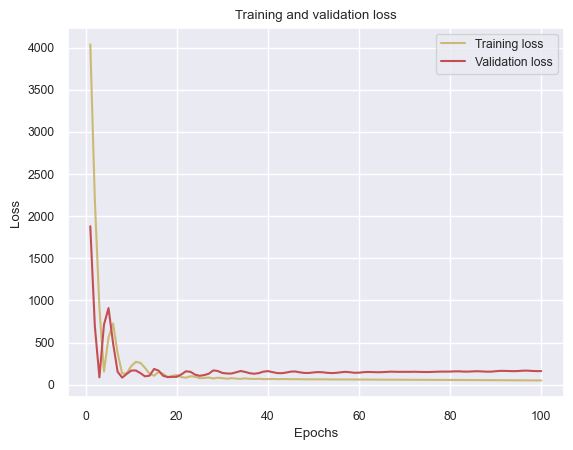

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model0_history.history['loss']
val_loss =model0_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## CNN

In [93]:
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(5, 1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(60, activation='relu'))
model1.add(Dense(1, activation='linear'))
model1.compile(Adam(learning_rate=0.02), loss='mean_squared_error', metrics=['mae'])
#model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 3, 64)             256       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_56 (Dense)            (None, 60)                3900      
                                                                 
 dense_57 (Dense)            (None, 1)                 61        
                                                                 
Total params: 4217 (16.47 KB)
Trainable params: 4217 (16.47 KB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [100]:
model1_history=model1.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test, y_test))
y_pred = model1.predict(X_test)

Epoch 1/100
1/1 [==============================] - 0s 152ms/step - loss: 81.1357 - mae: 7.1507 - val_loss: 114.5274 - val_mae: 9.6839
Epoch 2/100
1/1 [==============================] - 0s 82ms/step - loss: 81.0675 - mae: 7.1403 - val_loss: 114.2330 - val_mae: 9.6641
Epoch 3/100
1/1 [==============================] - 0s 92ms/step - loss: 80.9506 - mae: 7.1221 - val_loss: 113.8756 - val_mae: 9.6460
Epoch 4/100
1/1 [==============================] - 0s 84ms/step - loss: 80.8600 - mae: 7.1048 - val_loss: 113.6859 - val_mae: 9.6371
Epoch 5/100
1/1 [==============================] - 0s 93ms/step - loss: 80.7573 - mae: 7.0890 - val_loss: 113.6489 - val_mae: 9.6399
Epoch 6/100
1/1 [==============================] - 0s 86ms/step - loss: 80.6668 - mae: 7.0821 - val_loss: 113.8612 - val_mae: 9.6586
Epoch 7/100
1/1 [==============================] - 0s 86ms/step - loss: 80.5498 - mae: 7.0755 - val_loss: 114.1601 - val_mae: 9.6819
Epoch 8/100
1/1 [==============================] - 0s 90ms/step - lo

1/1 [==============================] - 0s 62ms/step - loss: 74.8594 - mae: 6.7258 - val_loss: 125.4940 - val_mae: 9.9086
Epoch 63/100
1/1 [==============================] - 0s 69ms/step - loss: 74.7377 - mae: 6.7136 - val_loss: 125.8665 - val_mae: 9.9168
Epoch 64/100
1/1 [==============================] - 0s 84ms/step - loss: 74.5618 - mae: 6.6957 - val_loss: 126.0574 - val_mae: 9.9079
Epoch 65/100
1/1 [==============================] - 0s 99ms/step - loss: 74.4501 - mae: 6.6753 - val_loss: 126.2801 - val_mae: 9.9002
Epoch 66/100
1/1 [==============================] - 0s 91ms/step - loss: 74.3147 - mae: 6.6589 - val_loss: 126.4601 - val_mae: 9.9088
Epoch 67/100
1/1 [==============================] - 0s 66ms/step - loss: 74.1839 - mae: 6.6520 - val_loss: 127.0647 - val_mae: 9.9518
Epoch 68/100
1/1 [==============================] - 0s 65ms/step - loss: 74.0422 - mae: 6.6596 - val_loss: 127.6069 - val_mae: 9.9767
Epoch 69/100
1/1 [==============================] - 0s 64ms/step - loss: 73

In [102]:
mse = np.sqrt(mean_squared_error(y_pred, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 11.773227139598776


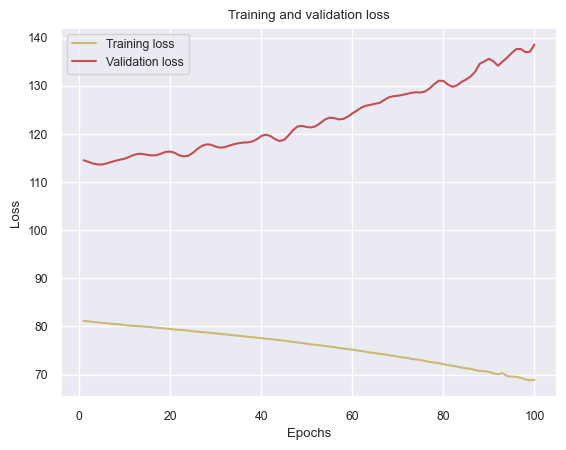

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model1_history.history['loss']
val_loss =model1_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#그래프 왜이럼

## RNN

In [89]:
model2 = Sequential()
model2.add(SimpleRNN(64, input_shape=(5, 1), activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.compile(Adam(learning_rate=0.02), loss='mean_squared_error', metrics=['mae'])

model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense_55 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
model2_history=model2.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test, y_test))
y_pred = model2.predict(X_test)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 3857.0708 - mae: 61.7492 - val_loss: 3159.5825 - val_mae: 52.4203
Epoch 2/100
1/1 [==============================] - 0s 71ms/step - loss: 4272.9585 - mae: 59.4924 - val_loss: 133.4910 - val_mae: 9.7290
Epoch 3/100
1/1 [==============================] - 0s 78ms/step - loss: 125.5287 - mae: 9.0910 - val_loss: 453.7653 - val_mae: 18.4420
Epoch 4/100
1/1 [==============================] - 0s 72ms/step - loss: 612.1344 - mae: 22.9882 - val_loss: 638.3606 - val_mae: 23.1990
Epoch 5/100
1/1 [==============================] - 0s 71ms/step - loss: 885.9189 - mae: 28.3622 - val_loss: 599.7401 - val_mae: 22.2713
Epoch 6/100
1/1 [==============================] - 0s 74ms/step - loss: 821.9399 - mae: 27.2123 - val_loss: 439.0488 - val_mae: 17.9744
Epoch 7/100
1/1 [==============================] - 0s 71ms/step - loss: 602.6632 - mae: 22.8388 - val_loss: 261.5748 - val_mae: 13.7523
Epoch 8/100
1/1 [==============================] 

Epoch 62/100
1/1 [==============================] - 0s 70ms/step - loss: 77.5983 - mae: 7.1500 - val_loss: 120.0456 - val_mae: 9.5744
Epoch 63/100
1/1 [==============================] - 0s 67ms/step - loss: 77.0988 - mae: 7.1137 - val_loss: 118.0050 - val_mae: 9.3952
Epoch 64/100
1/1 [==============================] - 0s 69ms/step - loss: 76.7508 - mae: 7.0732 - val_loss: 117.3695 - val_mae: 9.3257
Epoch 65/100
1/1 [==============================] - 0s 69ms/step - loss: 76.3065 - mae: 7.0347 - val_loss: 118.5101 - val_mae: 9.3993
Epoch 66/100
1/1 [==============================] - 0s 69ms/step - loss: 75.6380 - mae: 7.0043 - val_loss: 120.6800 - val_mae: 9.5628
Epoch 67/100
1/1 [==============================] - 0s 70ms/step - loss: 74.9457 - mae: 6.9763 - val_loss: 123.1506 - val_mae: 9.7297
Epoch 68/100
1/1 [==============================] - 0s 65ms/step - loss: 74.4469 - mae: 6.9454 - val_loss: 124.4872 - val_mae: 9.8020
Epoch 69/100
1/1 [==============================] - 0s 69ms/st

In [91]:
mse = np.sqrt(mean_squared_error(y_pred, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 11.591500661934633


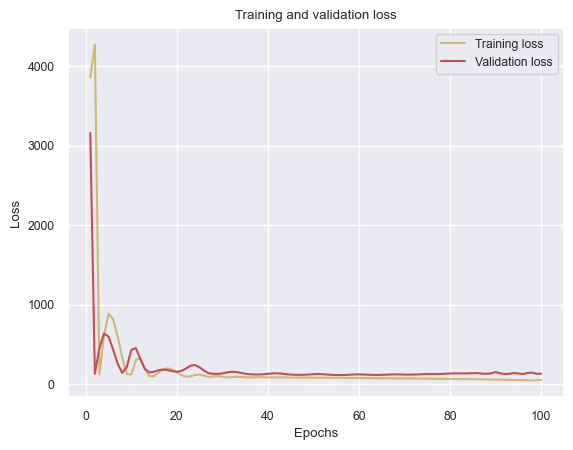

In [103]:
loss =model2_history.history['loss']
val_loss =model2_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## LSTM

In [104]:
model3 = Sequential()
model3.add(LSTM(64, input_shape=(5, 1), activation='relu'))
model3.add(Dense(1, activation='linear'))

model3.compile(Adam(learning_rate=0.02), loss='mean_squared_error', metrics=['mae'])

model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_58 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
model3_history=model3.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test, y_test))
y_pred = model3.predict(X_test)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 2472.2153 - mae: 49.1869 - val_loss: 165.8851 - val_mae: 9.9736
Epoch 2/100
1/1 [==============================] - 0s 48ms/step - loss: 300.7188 - mae: 13.7552 - val_loss: 1400.5878 - val_mae: 31.4036
Epoch 3/100
1/1 [==============================] - 0s 53ms/step - loss: 2047.6621 - mae: 37.1549 - val_loss: 324.3955 - val_mae: 15.1675
Epoch 4/100
1/1 [==============================] - 0s 46ms/step - loss: 360.3056 - mae: 16.1209 - val_loss: 719.8971 - val_mae: 25.4769
Epoch 5/100
1/1 [==============================] - 0s 52ms/step - loss: 774.0518 - mae: 25.9955 - val_loss: 698.5760 - val_mae: 24.9211
Epoch 6/100
1/1 [==============================] - 0s 77ms/step - loss: 741.5168 - mae: 25.3301 - val_loss: 606.3088 - val_mae: 22.7945
Epoch 7/100
1/1 [==============================] - 0s 73ms/step - loss: 625.7989 - mae: 22.5342 - val_loss: 487.9762 - val_mae: 20.0953
Epoch 8/100
1/1 [==============================]

1/1 [==============================] - 0s 87ms/step - loss: 27.0888 - mae: 3.6989 - val_loss: 22.2468 - val_mae: 3.9495
Epoch 63/100
1/1 [==============================] - 0s 79ms/step - loss: 23.9409 - mae: 3.5959 - val_loss: 77.6126 - val_mae: 7.8418
Epoch 64/100
1/1 [==============================] - 0s 83ms/step - loss: 31.0373 - mae: 4.4300 - val_loss: 20.0098 - val_mae: 3.3191
Epoch 65/100
1/1 [==============================] - 0s 74ms/step - loss: 21.7294 - mae: 3.3294 - val_loss: 20.9690 - val_mae: 3.2096
Epoch 66/100
1/1 [==============================] - 0s 79ms/step - loss: 22.3761 - mae: 3.2978 - val_loss: 67.3723 - val_mae: 7.4161
Epoch 67/100
1/1 [==============================] - 0s 71ms/step - loss: 15.2949 - mae: 3.1939 - val_loss: 62.1533 - val_mae: 7.2531
Epoch 68/100
1/1 [==============================] - 0s 41ms/step - loss: 15.0838 - mae: 3.2675 - val_loss: 9.2372 - val_mae: 2.8395
Epoch 69/100
1/1 [==============================] - 0s 48ms/step - loss: 19.8586 - 

In [106]:
mse = np.sqrt(mean_squared_error(y_pred, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 5.265537469667863


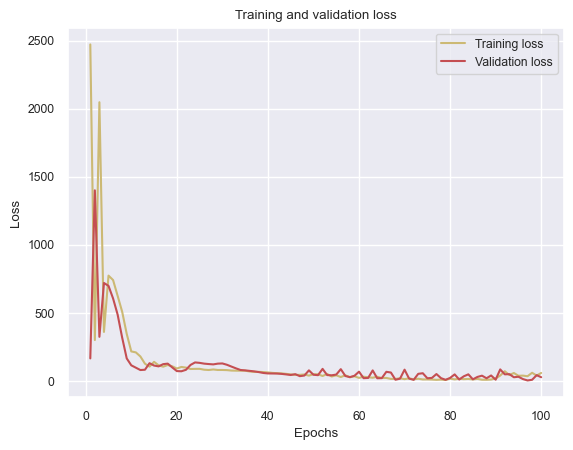

In [107]:
loss =model3_history.history['loss']
val_loss =model3_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()